In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
from os.path import join
pt=1./72.27
textwidth=345.*pt
golden = (1 + 5 ** 0.5) / 2
plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("paper.mplstyle")
std_figsize = (.45*textwidth,.45*textwidth/golden)
std_longfig= (.45*textwidth,.45*textwidth*golden)
large_longfig = (.9*textwidth,.9*textwidth*golden)
large_figsize =  (0.9*textwidth,0.9*textwidth/golden)
large_rot_figsize = (0.9*textwidth*golden,0.9*textwidth)
fig_direc = "figures"
# os.mkdir(fig_direc)
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [30]:
def plot_cell(file,figname=None,figsize=std_figsize):
    data = scipy.io.loadmat(file)
    signal = data['signal'].flatten()
    signal_um = data['signal_um'].flatten()
    bvals = data['bvals'].reshape(signal.shape)
    
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    ax.plot(bvals,signal,label='Our method',marker='x')
    ax.plot(bvals,signal_um,label='Modified ultraliser',marker='+',linestyle='dotted')
    
    ax.legend(loc='best')
    ax.set_ylim((0,1))
    ax.set_ylabel('Volume weighted signal')
    ax.set_xlabel('$b$ s/mm$^2$')
    plt.show()
    
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))

def plot_cell_difference(file,includeseg=False,figsize=large_figsize,figname=None,volume_limit=None,ymax=0.2):
    data = scipy.io.loadmat(file)
    signal = data['signal'].flatten()
    signal_um = data['signal_um'].flatten()
    bvals = data['bvals'].reshape(signal.shape)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    ax.plot(bvals,abs(signal-signal_um),label='Cell difference',marker='x')
    
    if includeseg:
        volume = data['volume']
        data = scipy.io.loadmat(file.replace('.mat','_seg.mat'))
        soma_signal = data['signal_soma'].flatten()
        soma_signal_ultraliser = data['signal_soma_um'].flatten()
        process_signals = data['process_signals']
        process_signals_um = data['process_signals_um']
        volumes =  data['volumes']
        volumes_um =  data['volumes_um']
        soma_volume = data['soma_volume']
        if volume_limit is not None:
            ind = np.asarray([i for i in range(0,len(volumes)) if (volumes[i] >= volume_limit) and (volumes_um[i]>=volume_limit)])
            if len(ind)>0 and len(volumes)>1:
                process_signals = np.array([process_signals[i] for i in ind])
                process_signals_um =np.array([process_signals_um[i] for i in ind])
                volumes = volumes[ind]
            print(f'Counting {len(ind)}/{len(volumes)} processes')
        nprocess = int(len(process_signals.flatten())//len(bvals))
        # ax.plot(bvals,abs(soma_signal-soma_signal_ultraliser),label='Soma',marker='x')
        if nprocess >1:
            # ax.plot(bvals,np.max(abs(process_signals-process_signals_um),axis=0).flatten(),label='Max Process difference',marker='x')
            cmpts_error= (soma_volume/volume)*abs(soma_signal-soma_signal_ultraliser)+np.sum(volumes*abs(process_signals-process_signals_um)/volume,axis=0)
            ax.plot(bvals,cmpts_error.flatten(),label='Volume weighted\ncompartment difference',marker='x')
            
        else:
            # ax.plot(bvals,abs(process_signals.flatten()-process_signals_um.flatten()),label='Process difference',marker='x')
            cmpts_error= (soma_volume/volume)*abs(soma_signal-soma_signal_ultraliser).flatten()+volumes[0]*abs(process_signals-process_signals_um).flatten()/volume
            ax.plot(bvals,cmpts_error.flatten(),label='Volume weighted components',marker='x')


    ax.legend(loc='best')
    ax.set_ylim((0,ymax))
    ax.set_ylabel('Volume weighted signal')
    ax.set_xlabel('$b$ s/mm$^2$')
    plt.show()
    
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))

def plot_cell_soma_process_difference(file,figsize=large_figsize,figname=None,ymax=None):
    data = scipy.io.loadmat(file)
    soma_signal = data['signal_soma'].flatten()
    soma_signal_ultraliser = data['signal_soma_um'].flatten()
    process_signals = data['process_signals']
    process_signals_um = data['process_signals_um']
    bvals = data['bvals'].flatten()
    volumes =  data['volumes']
    volumes_um =  data['volumes_um']
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    data = scipy.io.loadmat(file.replace('_seg',''))

    signal = data['signal'].flatten()
    signal_um = data['signal_um'].flatten()
    ax.plot(bvals,abs(signal-signal_um),marker='x',label='Cell')    

    ax.plot(bvals,abs(soma_signal-soma_signal_ultraliser),marker='x',label='Soma')

        
    nprocess = int(len(process_signals.flatten())//len(bvals))
    if nprocess>1:
        V = np.sum(volumes)
        V_um = np.sum(volumes_um)
        process_errors=abs(np.sum(volumes*process_signals/V,axis=0) - np.sum(volumes_um*process_signals_um/V_um,axis=0))
        ax.plot(bvals,process_errors.flatten(),marker='x',label='Processes')
    else:
        process_errors=abs(process_signals - process_signals_um)
        ax.plot(bvals,process_errors.flatten(),marker='x',label='Processes')   
    ax.legend(loc='best')
    # ax.legend(loc='best')
    if ymax is not None:
        ax.set_ylim((0,ymax))
    ax.set_ylabel('Volume weighted signal difference')
    ax.set_xlabel('$b$ s/mm$^2$')
    plt.show()
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))


def plot_cell_soma_process(file,figsize=large_figsize,figname=None,ymax=1):
    data = scipy.io.loadmat(file)
    soma_signal = data['signal_soma'].flatten()
    soma_signal_ultraliser = data['signal_soma_um'].flatten()
    process_signals = data['process_signals']
    process_signals_um = data['process_signals_um']
    bvals = data['bvals'].flatten()
    volumes =  data['volumes']
    volumes_um =  data['volumes_um']
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    data = scipy.io.loadmat(file.replace('_seg',''))

    signal = data['signal'].flatten()
    signal_um = data['signal_um'].flatten()
    ax.plot(bvals,signal,marker='x',color=line_colors[0])
    ax.plot(bvals,signal_um,marker='+', linestyle='dotted',color=line_colors[0])
    

    ax.plot(bvals,soma_signal,marker='x',color=line_colors[1])
    ax.plot(bvals,soma_signal_ultraliser,marker='+', linestyle='dotted',color=line_colors[1])

        
    nprocess = int(len(process_signals.flatten())//len(bvals))
    if nprocess>1:
        V = np.sum(volumes)
        V_um = np.sum(volumes_um)
        ax.plot(bvals,np.sum(volumes*process_signals/V,axis=0).flatten(),marker='x',color=line_colors[2])
        ax.plot(bvals,np.sum(volumes_um*process_signals_um/V_um,axis=0).flatten(),marker='+', linestyle='dotted',color=line_colors[2])
    else:
        ax.plot(bvals,process_signals.flatten(),marker='x',color=line_colors[2])
        ax.plot(bvals,process_signals_um.flatten(),marker='+', linestyle='dotted',color=line_colors[2])
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=line_colors[i], lw=1) for i in range(0,3)]
    custom_lines.append(Line2D([0], [0],marker='x', color='k', lw=1))
    custom_lines.append(Line2D([0], [0],marker='+', color='k',linestyle='dotted', lw=1))

    labels=['Cell','Soma']
    labels.extend(['Combined Processes'])
    labels.append('Alpha_Mesh_Swc')
    labels.append('Modified Ultraliser')
    ax.legend(custom_lines, labels,loc='best')
    # ax.legend(loc='best')
    ax.set_ylim((0,ymax))
    ax.set_ylabel('Volume weighted signal')
    ax.set_xlabel('$b$ s/mm$^2$')
    plt.show()
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))

def plot_segmented_cell(file,figsize=large_figsize,figname=None,volume_limit=None):
    data = scipy.io.loadmat(file)
    soma_signal = data['signal_soma'].flatten()
    soma_signal_ultraliser = data['signal_soma_um'].flatten()
    process_signals = data['process_signals']
    process_signals_um = data['process_signals_um']
    bvals = data['bvals'].flatten()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.plot(bvals,soma_signal,marker='x',color=line_colors[0])
    ax.plot(bvals,soma_signal_ultraliser,marker='+', linestyle='dotted',color=line_colors[0])
    if volume_limit is not None:
        volumes =  data['volumes']
        volumes_um =  data['volumes_um']
        ind = np.asarray([i for i in range(0,len(volumes)) if (volumes[i] >= volume_limit) and (volumes_um[i]>=volume_limit)])
        if len(ind)>0 and len(volumes)>1:
            process_signals = np.array([process_signals[i] for i in ind])
            process_signals_um =np.array([process_signals_um[i] for i in ind])
        print(f'Counting {len(ind)}/{len(volumes)} processes')
        
    nprocess = int(len(process_signals.flatten())//len(bvals))
    if nprocess>1:
        for i in range(0,nprocess):
            ax.plot(bvals,process_signals[i,:],marker='x',color=line_colors[i+1])
            ax.plot(bvals,process_signals_um[i,:],marker='+', linestyle='dotted',color=line_colors[i+1])
    else:
        ax.plot(bvals,process_signals.flatten(),marker='x',color=line_colors[1])
        ax.plot(bvals,process_signals_um.flatten(),marker='+', linestyle='dotted',color=line_colors[1])
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=line_colors[i], lw=1) for i in range(0,nprocess+1)]
    custom_lines.append(Line2D([0], [0],marker='x', color='k', lw=1))
    custom_lines.append(Line2D([0], [0],marker='+', color='k',linestyle='dotted', lw=1))

    labels = ['Soma']
    labels.extend([f'Process {i+1}' for i in range(0,nprocess)])
    labels.append('Our method')
    labels.append('Modified Ultraliser')
    ax.legend(custom_lines, labels,loc='best')
    # ax.legend(loc='best')
    ax.set_ylim((0,1))
    ax.set_ylabel('Volume weighted signal')
    ax.set_xlabel('$b$ s/mm$^2$')
    plt.show()
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))

def plot_errors(file,figsize=large_figsize,figname=None,rel=False):
    data = scipy.io.loadmat(file)
    bvals = data['bvals'].flatten()
    if rel:
        error = data['rel_error'].flatten()
    else:
        error = data['abs_error'].flatten()
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.plot(bvals,error,label='Cell',marker='o')
    ax.set_ylabel('Signal error')
    ax.set_xlabel('$b$ s/mm$^2$')
    if rel:
        ax.set_yscale('log')
    plt.show()
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))

def plot_segmented_errors(file,figsize=large_figsize,figname=None,rel=False):
    data = scipy.io.loadmat(file)
    bvals = data['bvals'].flatten()
    if rel:
        soma_errors = data['rel_error'].flatten()
        dend_errors =data['neurites_rel_error']
    else:
        soma_errors = data['abs_error'].flatten()
        dend_errors =data['neurites_abs_error']
        
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.plot(bvals,soma_errors,label='Soma error',marker='o')
    nprocess = int(len(dend_errors.flatten())//len(bvals))
    dend_errors = np.reshape(dend_errors,(nprocess,-1))
    if nprocess >1:
        # for i in range(0,nprocess):
        #     ax.plot(bvals,dend_errors[i,:],label=f'Process {i+1}',marker='o')
        ax.plot(bvals,np.mean(dend_errors,axis=0),label=f'Mean Process error',marker='o')
        # ax.plot(bvals,np.mean(dend_errors,axis=0),label=f'Mean Process error',marker='o')
    else:
        ax.plot(bvals,dend_errors.flatten(),label=f'Process 1',marker='o')

    ax.legend(loc='best')
    # ax.set_ylim((0,1))
    ax.set_ylabel('Volume weighted signal error')
    ax.set_xlabel('$b$ s/mm$^2$')
    if rel:
        ax.set_yscale('log')
        max_soma = max(soma_errors)
        min_soma = min(soma_errors)
        max_dend = max(dend_errors.flatten())
        min_dend = min(dend_errors.flatten())        
        y_max = np.floor(np.log10(max(max_soma,max_dend))) +1 

        y_min = np.floor(np.log10(min(min_soma,min_dend))) 
        ax.set_ylim((10**y_min,10**y_max))
    plt.show()
    if figname is not None:
        fig.savefig(join(fig_direc,figname.replace('.','_')))



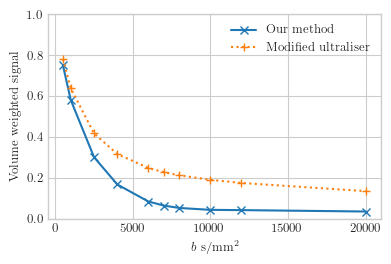

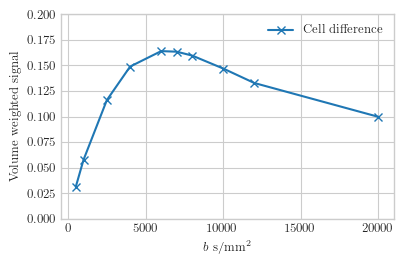

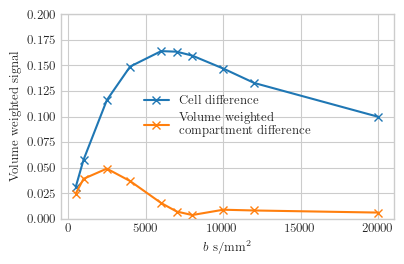

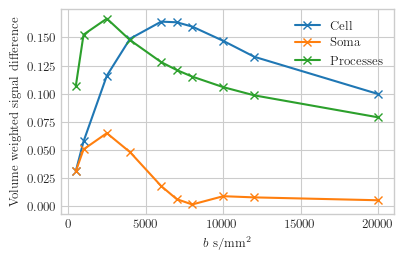

In [21]:
file=r'../neuron_meshing_paper/neuron_output/1-2-2.CNG.mat'
plot_cell(file,figsize=large_figsize,figname='dmri_signals_cell')
plot_cell_difference(file)
plot_cell_difference(file,includeseg=True)
file=r'../neuron_meshing_paper/neuron_output/1-2-2.CNG_seg.mat'

plot_cell_soma_process_difference(file,figname='1-2-2.CNG_difference_breakdown')


microglia_output\714_3_2.mat


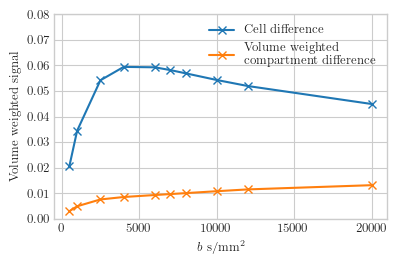

microglia_output\714_3_3.mat


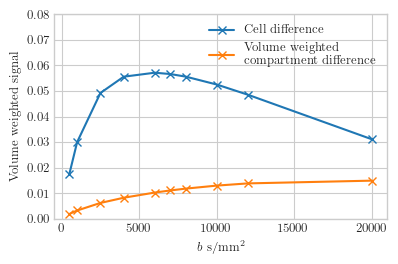

microglia_output\766_4_3.mat


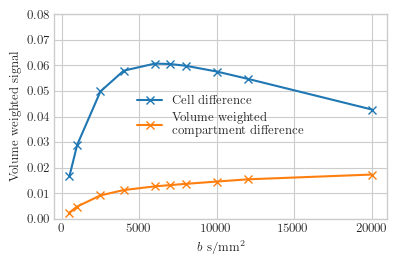

microglia_output\818_1_3.mat


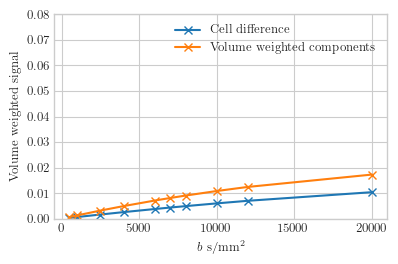

microglia_output\826_6_3.mat


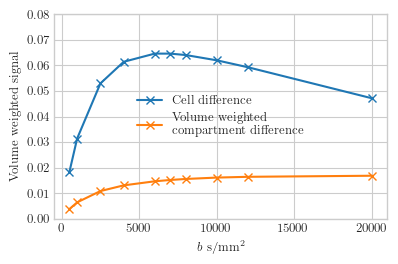

microglia_output\ctrl_010319_13_826-2_1.mat


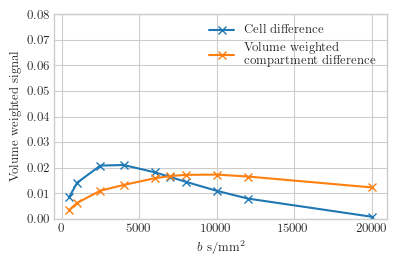

In [4]:
dirname = r"microglia_output"
dir = os.listdir(dirname)
for file in dir:
    file = os.path.join(dirname,file)
    if not(file.endswith('_seg.mat')) and not(file.endswith('_convergence.mat')) and file.endswith('.mat'):
        print(file)
        cellname= os.path.basename(file)
        figname= cellname.replace('.mat','_difference_breakdown')
        if  not('ctrl_010319_13_826-2_1' in file) and not('826_6_3' in file):
            plot_cell_difference(file,includeseg=True,volume_limit=None,ymax=0.08,figname=figname)
        else:
            plot_cell_difference(file,includeseg=True,volume_limit=None,ymax=0.08,figname=figname)


..\neuron_meshing_paper\microglia_output\714_3_2_seg.mat


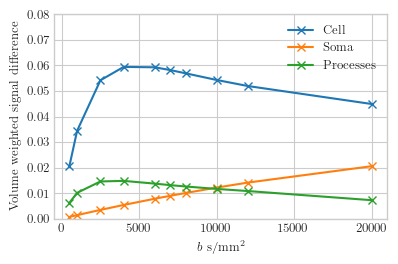

..\neuron_meshing_paper\microglia_output\714_3_3_seg.mat


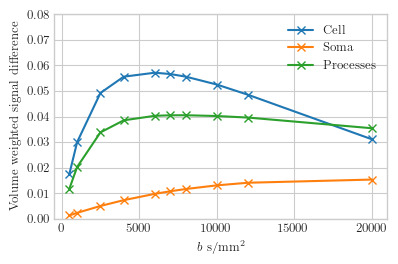

..\neuron_meshing_paper\microglia_output\766_4_3_seg.mat


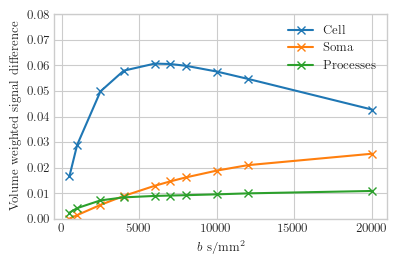

..\neuron_meshing_paper\microglia_output\818_1_3_seg.mat


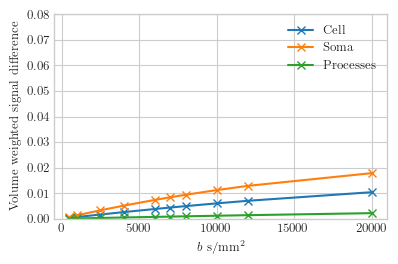

..\neuron_meshing_paper\microglia_output\826_6_3_seg.mat


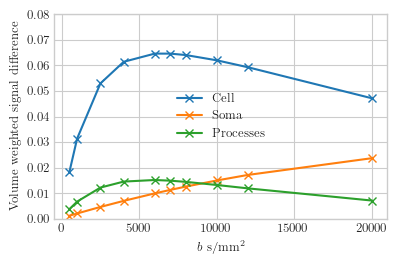

..\neuron_meshing_paper\microglia_output\ctrl_010319_13_826-2_1_seg.mat


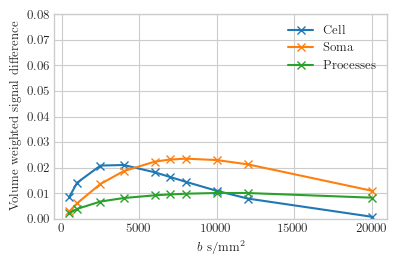

In [14]:
dirname = r"..\neuron_meshing_paper\microglia_output"
dir = os.listdir(dirname)
for file in dir:
    file = os.path.join(dirname,file)
    if file.endswith('_seg.mat') and not(file.endswith('_convergence_seg.mat')):
        data=scipy.io.loadmat(file)
        cellname= os.path.basename(file)
        # plot_componentwise_average(file)
        
        print(file)
        # plot_segmented_cell(file,figname=cellname.replace('.mat',''),volume_limit=6)
        plot_cell_soma_process_difference(file,figname=cellname.replace('.mat','_difference_breakdown'),ymax=0.08)
        # plot_cell_soma_process(file)

714_3_2.mat


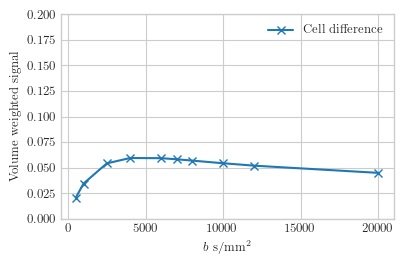

714_3_3.mat


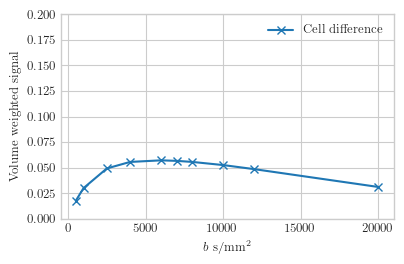

766_4_3.mat


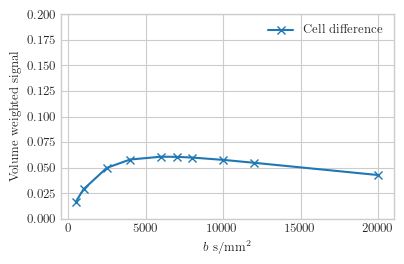

818_1_3.mat


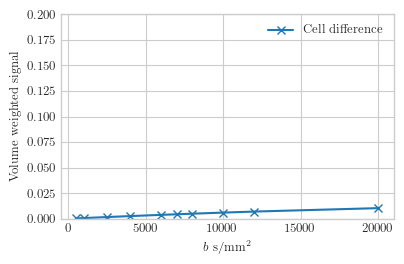

826_6_3.mat


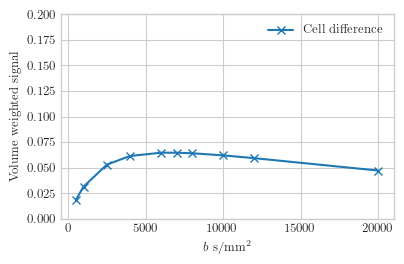

ctrl_010319_13_826-2_1.mat


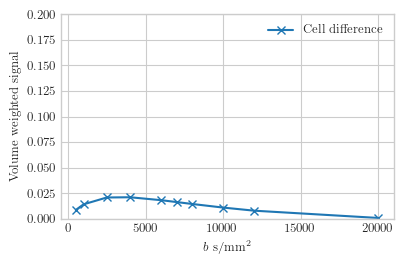

In [6]:
dirname = r"C:\Users\amcsween\Documents\GitHub\SpinDoctor\neuron_meshing_paper\microglia_output"
dir = os.listdir(dirname)
for file in dir:
    file = os.path.join(dirname,file)
    if (file.endswith('.mat')) and not(file.endswith('_seg.mat')) and not(file.endswith('_convergence.mat')):
        data=scipy.io.loadmat(file)
        cellname= os.path.basename(file)
        print(cellname)
        # plot_cell(file)
        plot_cell_difference(file)

..\neuron_meshing_paper\microglia_output\714_3_2_convergence.mat


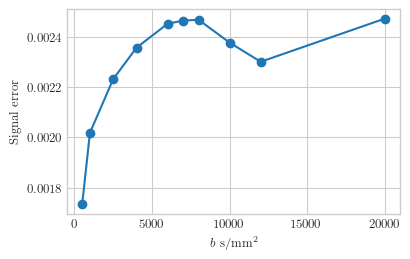

..\neuron_meshing_paper\microglia_output\714_3_3_convergence.mat


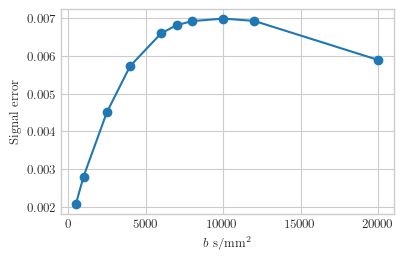

..\neuron_meshing_paper\microglia_output\766_4_3_convergence.mat


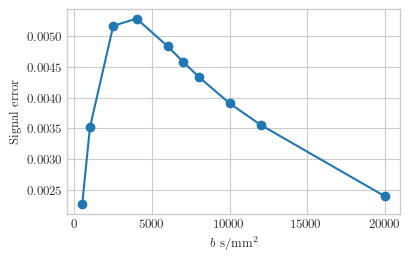

..\neuron_meshing_paper\microglia_output\818_1_3_convergence.mat


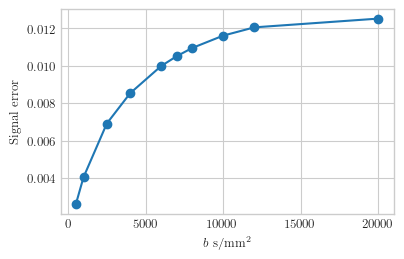

..\neuron_meshing_paper\microglia_output\826_6_3_convergence.mat


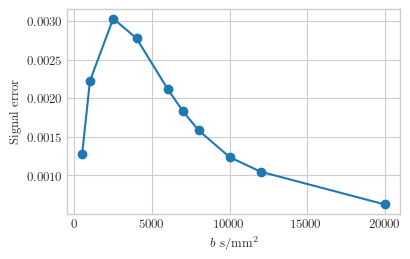

..\neuron_meshing_paper\microglia_output\ctrl_010319_13_826-2_1_convergence.mat


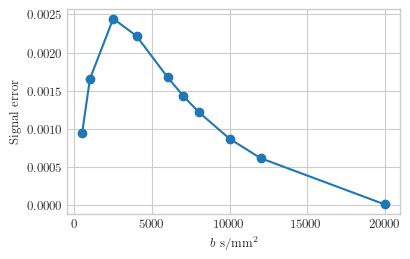

In [33]:
dirname = r"..\neuron_meshing_paper\microglia_output"
dir = os.listdir(dirname)
for file in dir:
    file = os.path.join(dirname,file)
    if (file.endswith('_convergence.mat')):
        data=scipy.io.loadmat(file)
        cellname= os.path.basename(file)
        print(file)
        plot_errors(file,rel=False,figname=cellname.replace('.mat',''))

..\neuron_meshing_paper\microglia_output\714_3_2_convergence_seg.mat


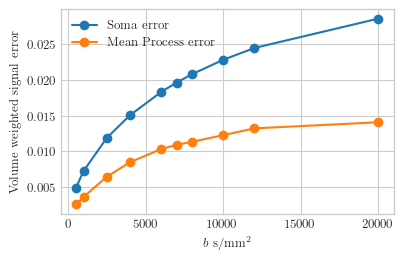

..\neuron_meshing_paper\microglia_output\714_3_2_um_convergence_seg.mat


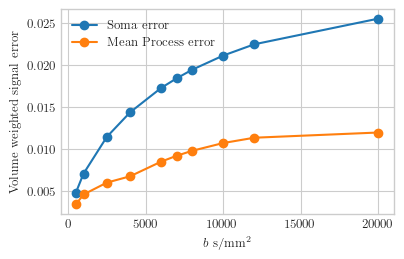

..\neuron_meshing_paper\microglia_output\714_3_3_convergence_seg.mat


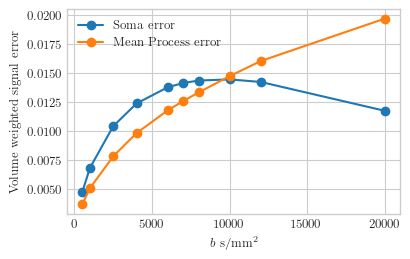

..\neuron_meshing_paper\microglia_output\714_3_3_um_convergence_seg.mat


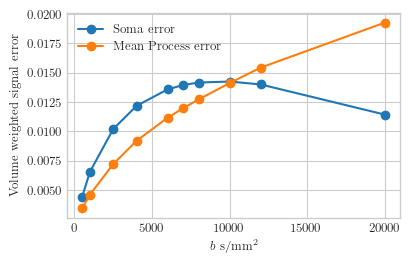

..\neuron_meshing_paper\microglia_output\766_4_3_convergence_seg.mat


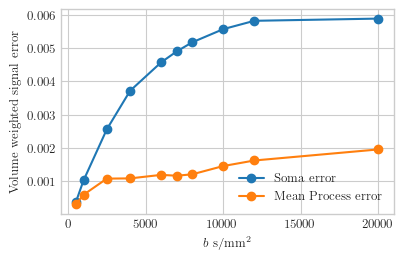

..\neuron_meshing_paper\microglia_output\766_4_3_um_convergence_seg.mat


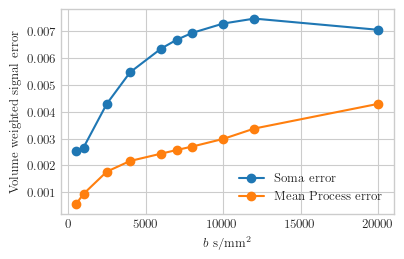

..\neuron_meshing_paper\microglia_output\818_1_3_convergence_seg.mat


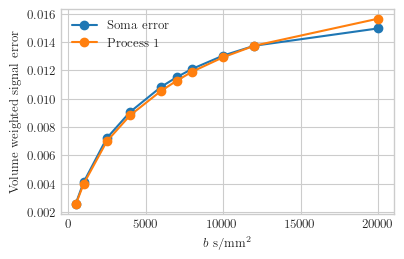

..\neuron_meshing_paper\microglia_output\818_1_3_um_convergence_seg.mat


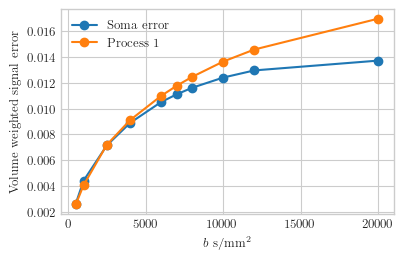

..\neuron_meshing_paper\microglia_output\826_6_3_convergence_seg.mat


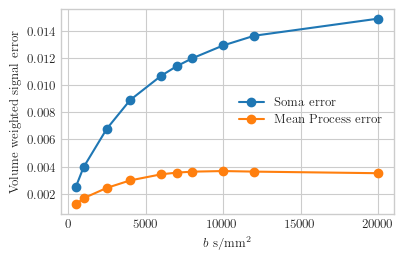

..\neuron_meshing_paper\microglia_output\826_6_3_um_convergence_seg.mat


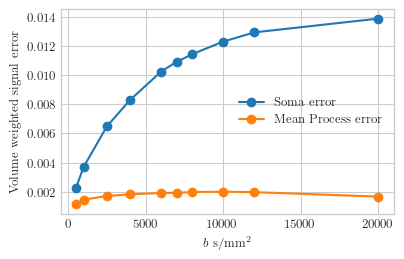

..\neuron_meshing_paper\microglia_output\ctrl_010319_13_826-2_1_convergence_seg.mat


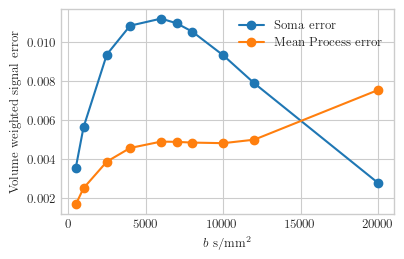

..\neuron_meshing_paper\microglia_output\ctrl_010319_13_826-2_1_um_convergence_seg.mat


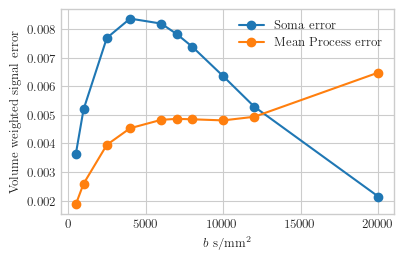

In [32]:
dirname = r"..\neuron_meshing_paper\microglia_output"
dir = os.listdir(dirname)
for file in dir:
    file = os.path.join(dirname,file)
    if (file.endswith('_convergence_seg.mat')):
        data=scipy.io.loadmat(file)
        cellname= os.path.basename(file)
        print(file)
        plot_segmented_errors(file,rel=False,figname=cellname.replace('.mat',''))

In [ ]:
scipy.io.loadmat(r'..\neuron_meshing_paper\microglia_output\826_6_3_convergence_seg.mat')